In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df.shape

(110527, 14)

In [12]:
df["PatientId"].duplicated().sum()


48228

In [13]:
df["PatientId"].nunique()

62299

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [15]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [20]:
df[df['Age']<0].dropp

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [22]:
df.drop(index=99832,inplace=True)

In [23]:
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'No_show'},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [25]:
df.drop_duplicates(['PatientId','No_show'], inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [26]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71816 entries, 0 to 110524
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         71816 non-null  object
 1   Age            71816 non-null  int64 
 2   Neighbourhood  71816 non-null  object
 3   Scholarship    71816 non-null  int64 
 4   Hypertension   71816 non-null  int64 
 5   Diabetes       71816 non-null  int64 
 6   Alcoholism     71816 non-null  int64 
 7   Handcap        71816 non-null  int64 
 8   SMS_received   71816 non-null  int64 
 9   No_show        71816 non-null  object
dtypes: int64(7), object(3)
memory usage: 6.0+ MB


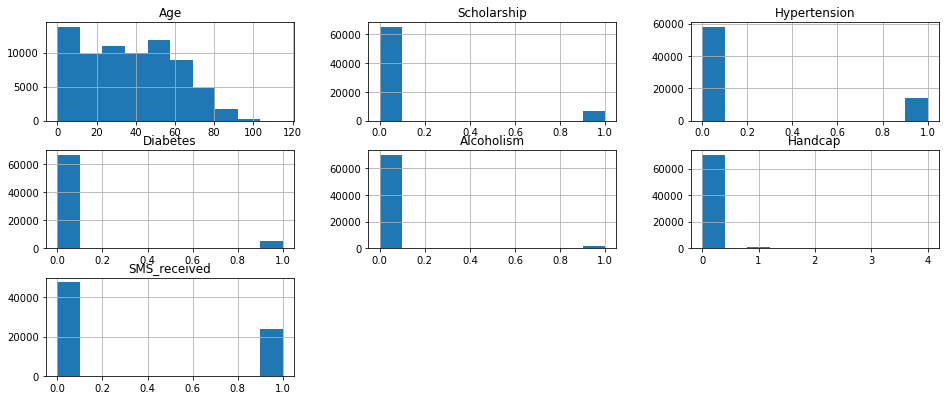

In [29]:
df.hist(figsize=(16,6.5))

In [45]:
show = df[df['No_show']=='Yes'].count()
noshow = df[df['No_show']=='No'].count()
print(show,'--------------------------- ')
print(noshow)

Gender           17663
Age              17663
Neighbourhood    17663
Scholarship      17663
Hypertension     17663
Diabetes         17663
Alcoholism       17663
Handcap          17663
SMS_received     17663
No_show          17663
dtype: int64 --------------------------- 
Gender           54153
Age              54153
Neighbourhood    54153
Scholarship      54153
Hypertension     54153
Diabetes         54153
Alcoholism       54153
Handcap          54153
SMS_received     54153
No_show          54153
dtype: int64


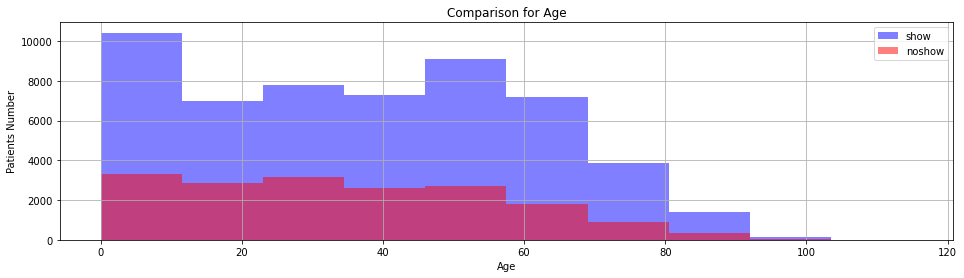

In [52]:
def attendance(df,col_name,attended,absent):
    
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=0.5,bins=10,color="blue",label="show")
    df[col_name][noshow].hist(alpha=0.5,bins=10,color="red",label="noshow")
    plt.legend();
    plt.title("Comparison for Age")
    plt.xlabel('Age')
    plt.ylabel('Patients Number');
attendance(df,"Age",show,noshow)

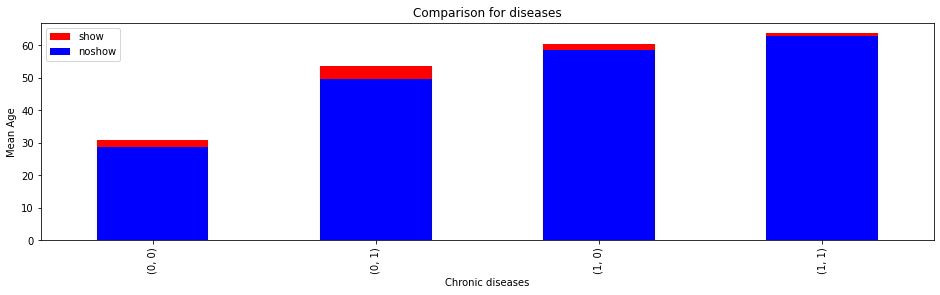

In [53]:
plt.figure(figsize=[16,4])
df[show].groupby(['Hypertension','Diabetes']).Age.mean().plot(kind='bar',color='red',label='show')
df[noshow].groupby(['Hypertension','Diabetes']).Age.mean().plot(kind='bar',color='blue',label='noshow')
plt.legend();
plt.title('Comparison for diseases')
plt.xlabel('Chronic diseases')
plt.ylabel('Mean Age');

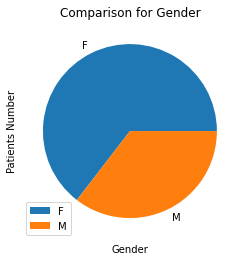

In [56]:
def attendance(df,col_name,attended,absent):
    
    plt.figure(figsize=[16,4])
    df[col_name][show].value_counts(normalize=True).plot(kind="pie",label='show')
    plt.legend();
    plt.title("Comparison for Gender")
    plt.xlabel('Gender')
    plt.ylabel('Patients Number');
attendance(df,"Gender",show,noshow);

In [63]:
df[show].mean(),df[noshow].mean()

C:\Users\Master\AppData\Local\Temp\ipykernel_10096\3233283171.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[show].mean(),df[noshow].mean()


(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64,
 Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

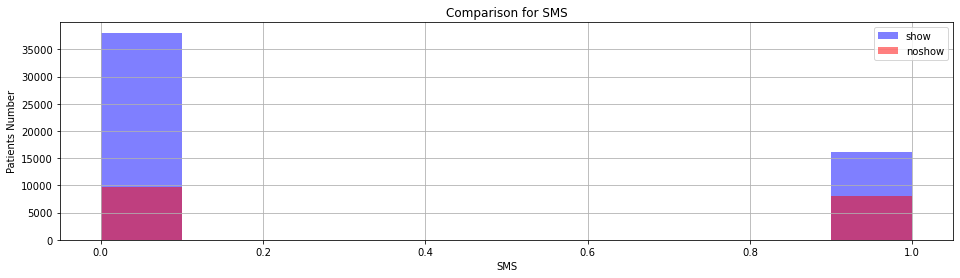

In [57]:
def attendance(df,col_name,attended,absent):
    
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=0.5,bins=10,color="blue",label="show")
    df[col_name][noshow].hist(alpha=0.5,bins=10,color="red",label="noshow")
    plt.legend();
    plt.title("Comparison for SMS")
    plt.xlabel('SMS')
    plt.ylabel('Patients Number');
attendance(df,"SMS_received",show,noshow)

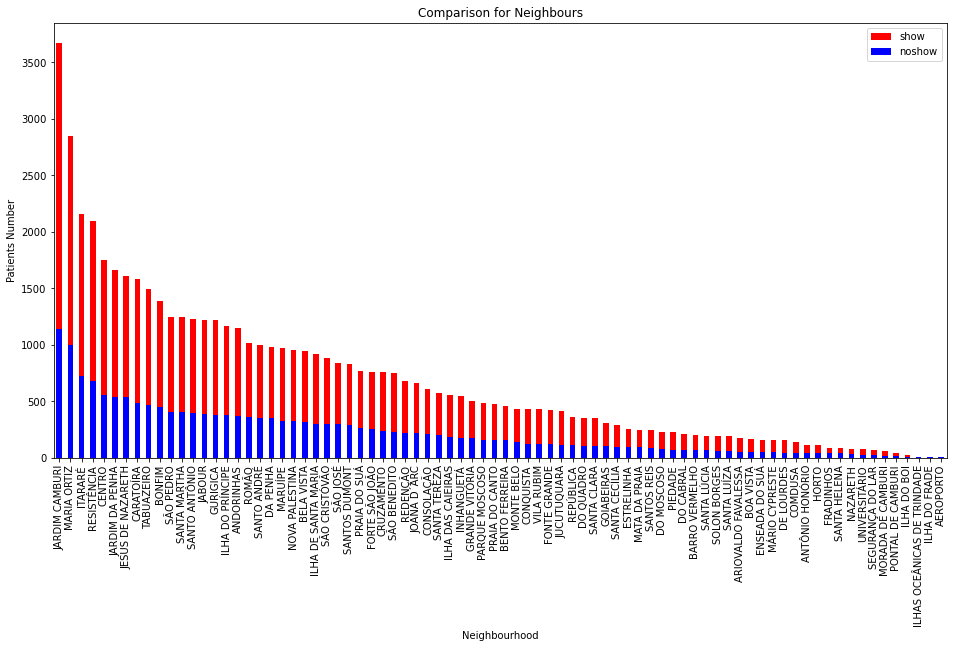

In [58]:
plt.figure(figsize=[16,8])
df.Neighbourhood[show].value_counts().plot(kind='bar',color='red',label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar',color='blue',label='noshow')
plt.legend();
plt.title('Comparison for Neighbours')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

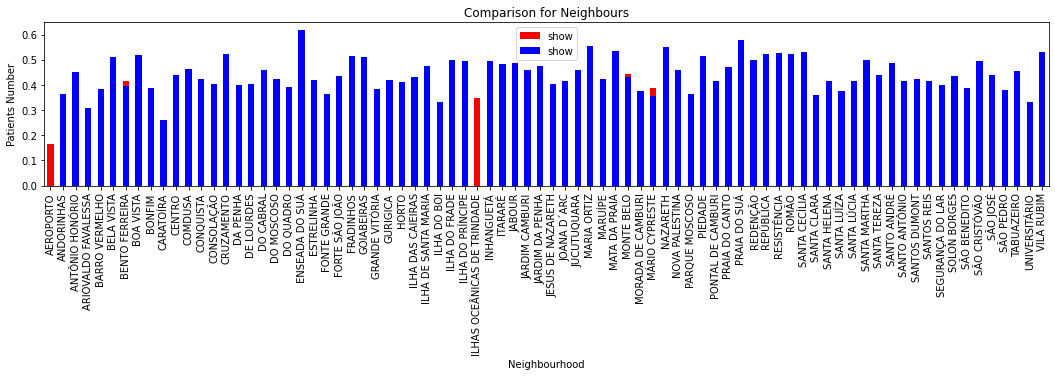

In [64]:
plt.figure(figsize=[18,3])
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar', color='red', label='show')
df[noshow].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar', color='blue', label='show')
plt.legend();
plt.title('Comparison for Neighbours')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');